# IMAGE CLASSIFICATION (MNIST-10) USING CNNs - APPLICATION

In [8]:
## Import libraries and Dataset
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [10]:
# Hmmm, looks like our labels are literally categories of numbers. We need to translate this to 
# be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of
# regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
print('y_categorical_train shape:', y_cat_train.shape)
print('y_categorical_test shape:', y_cat_test.shape)


y_categorical_train shape: (60000, 10)
y_categorical_test shape: (10000, 10)


In [11]:
# determining the value to be normalised 
x_train = x_train/255
x_test = x_test/255

In [12]:
# Reshaping the Data
# Right now our data is 60,000 images stored in 28 by 28 pixel array formation.
# This is correct for a CNN, but we need to add one more dimension to show we're dealing with 
# 1 RGB channel (since technically the images are in black and white, only showing values from 
# 0-255 on a single channel), an color image would have 3 dimensions.
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)
print('Now x_train after re-shape:', x_train.shape)
print('Now x_test after re-shape:', x_test.shape)

Now x_train after re-shape: (60000, 28, 28, 1)
Now x_test after re-shape: (10000, 28, 28, 1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
60000/60000 [==============================] - 46s 766us/step - loss: 0.1358 - accuracy: 0.9595
Epoch 2/

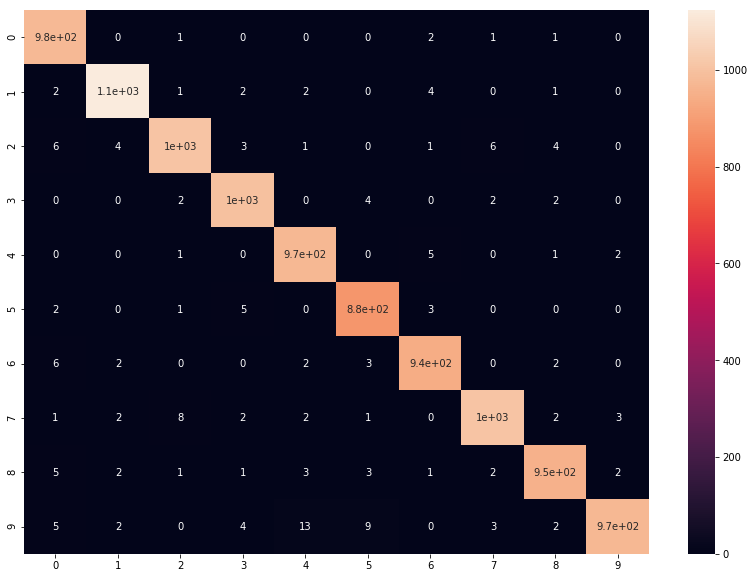

In [13]:
# Train the model
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model Summary
model.summary()

# Run the model using the number of epochs
model.fit(x_train,y_cat_train,epochs=2)

model.evaluate(x_test,y_cat_test)

predictions = model.predict_classes(x_test)

# Confusion Matrix (Sum the diagonal element to get the total true correct values)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

# classifiation report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predictions, target_names = target_names))

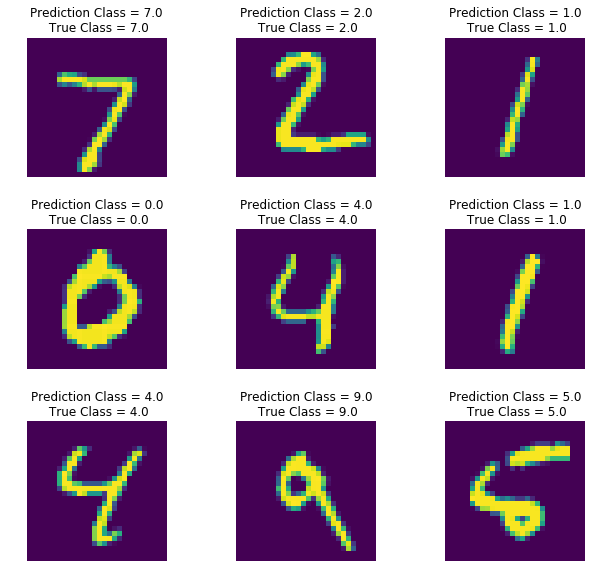

In [14]:
# Plot the predict vs true class for visulaizing purposes
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)